# QCNN demo

In [2]:
from qcnn import QuantumCNN
from qibo import gates
import random
import numpy as np

import qibo
qibo.set_backend("numpy")

[Qibo 0.1.8|INFO|2023-02-13 12:29:39]: Using numpy backend on /CPU:0


## load data

In [11]:
data = np.load('nqubits_4_data_shuffled_no0.npy')
labels = np.load('nqubits_4_labels_shuffled_no0.npy')
labels = np.transpose(np.array([labels])) # restructure to required array format

In [12]:
data[-2:]

array([[0.52745364+0.j, 0.19856967+0.j, 0.19856967+0.j, 0.16507377+0.j,
        0.19856967+0.j, 0.09784837+0.j, 0.16507377+0.j, 0.19856967+0.j,
        0.19856967+0.j, 0.16507377+0.j, 0.09784837+0.j, 0.19856967+0.j,
        0.16507377+0.j, 0.19856967+0.j, 0.19856967+0.j, 0.52745364+0.j],
       [0.67109214+0.j, 0.10384038+0.j, 0.10384038+0.j, 0.05351362+0.j,
        0.10384038+0.j, 0.02786792+0.j, 0.05351362+0.j, 0.10384038+0.j,
        0.10384038+0.j, 0.05351362+0.j, 0.02786792+0.j, 0.10384038+0.j,
        0.05351362+0.j, 0.10384038+0.j, 0.10384038+0.j, 0.67109214+0.j]])

In [13]:
labels[-2:]

array([[ 1.],
       [-1.]])

## split train/test data 60:40

In [ ]:
split_ind = int(len(data) * 0.6)
train_data = data[:split_ind]
test_data = data[split_ind:]

train_labels = labels[:split_ind]
test_labels = labels[split_ind:]

## initialize model

In [6]:
# initialize model instance
test = QuantumCNN(nqubits=4, nlayers=1, nclasses=2)
testcircuit = test._circuit
testcircuit.draw()

'q0:     ─RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ──────────────────────────────────────── ...\nq1:     ─RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ─────────────RX─RY─RZ──────────RZZ─RYY─R ...\nq2:     ──────────────────────RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ─RX─RY─RZ─RZZ─RYY─R ...\nq3:     ──────────────────────RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ─────────────────── ...\n\nq0: ... ───RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ─RX─RY─RZ─o───────────────────────\nq1: ... XX─RX─RY─RZ─|───|───|─────────────────────|─RX─RY─RZ─o────────────\nq2: ... XX─RX─RY─RZ─|───|───|───RX─RY─RZ──────────X─RZ─RY─RX─|────────────\nq3: ... ───RX─RY─RZ─RZZ─RYY─RXX─RX─RY─RZ────────────RX─RY─RZ─X─RZ─RY─RX─M─'

In [17]:
# initialize model parameters
testbias = np.zeros(test.measured_qubits)
testangles = [random.uniform(0,2*np.pi) for i in range(21*2)]
init_theta = np.concatenate((testbias, testangles))

## train and/or update model with optimize parameters

In [ ]:
# train model (automatically updates model with optimized paramters)
result = test.minimize(init_theta, data=train_data, labels=labels, nshots=10000, method='Powell')

In [ ]:
# alternatively, update model with optimized parameters from previous training
saved_result_60 = (0.2026119742575817, np.array([ -0.06559061,   3.62881221,   2.39850148,   3.02493711,
         0.91498683,   3.25517842,   0.0759049 ,   3.46049453,
         3.04395784,   1.55681424,   2.3665245 ,   0.40291846,
         5.67310744,   2.27615444,   5.23403537,   0.46053411,
         0.69228362,   2.2308165 ,   0.53323661,   4.52157388,
         5.31194656,  18.23511858,  -1.90754635,  14.30577217,
        10.75135972,  19.16001316,  12.27582746,   7.47476354,
        23.38129141,  60.29771502,  10.02946377,  17.83945879,
        15.22732248,  12.34666584,   1.52634649,   1.90621517,
        12.71554053, -13.56379057,  34.04591253, -11.56450878,
        10.95038782,   3.30640208,   9.67270071]))

test.set_circuit_params(angles=saved_result_60[1], has_bias=True)

## generate predictions from optimized model

In [18]:
predictions = []
for n in range(len(test_data)):
    predictions.append(test.predict(test_data[n], nshots=10000)[0])

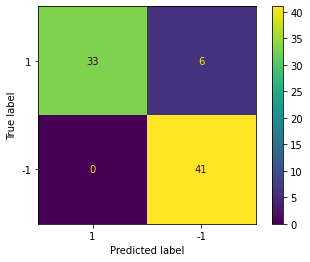

In [19]:
from sklearn import metrics

actual = [np.sign(test_labels) for test_labels in test_labels]
predicted = [np.sign(prediction) for prediction in predictions]

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [1, -1])

cm_display.plot()
plt.show()

In [17]:
test.Accuracy(test_labels,predictions)

0.925